In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dateutil.parser
import seaborn as sns
from IPython.display import Image
import os
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from math import sqrt
from sklearn import linear_model
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import pipeline, preprocessing, neighbors, model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


/Users/justinblinder/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 20)
pd.set_option('display.precision', 3)

In [4]:
df_pluto = pd.read_pickle('../data/pkl/df_pluto-cat-feat-2016-2017.pkl')
# Drop categorical columns
df_pluto = df_pluto[df_pluto.columns.difference(['BldgClass','FireComp','IrrLotCode','Sanborn','SplitZone','ZoneDist1'])]
df_pluto = df_pluto[df_pluto.columns.difference(['APPBBL','AreaSource','BBL','BoroCode','CondoNo','TaxMap'])]
df_pluto = df_pluto[df_pluto.columns.difference(['new_bldg_prob'])]
# Drop rows with NANs
df_pluto = df_pluto.dropna()

In [22]:
df_pluto

,AssessLand,AssessTot,BldgArea,BldgDepth,BldgFront,Block,BsmtCode,BuiltFAR,CB2010,CD_301,CD_302,CD_303,CD_304,CD_305,CD_306,CD_307,CD_308,CD_309,CD_310,CD_311,CD_312,CD_313,CD_314,CD_315,CD_316,CD_317,CD_318,CD_355,CD_356,CD_410,CT2010,ComArea,CommFAR,Council_33.0,Council_34.0,Council_35.0,Council_36.0,Council_37.0,Council_38.0,Council_39.0,Council_40.0,Council_41.0,Council_42.0,Council_43.0,Council_44.0,Council_45.0,Council_46.0,Council_47.0,Council_48.0,Easements,...,Tract2010,UnitsRes,UnitsTotal,XCoord,YCoord,YearAlter1,YearAlter2,YearBuilt,ZipCode_11201.0,ZipCode_11203.0,ZipCode_11204.0,ZipCode_11205.0,ZipCode_11206.0,ZipCode_11207.0,ZipCode_11208.0,ZipCode_11209.0,ZipCode_11210.0,ZipCode_11211.0,ZipCode_11212.0,ZipCode_11213.0,ZipCode_11214.0,ZipCode_11215.0,ZipCode_11216.0,ZipCode_11217.0,ZipCode_11218.0,ZipCode_11219.0,ZipCode_11220.0,ZipCode_11221.0,ZipCode_11222.0,ZipCode_11223.0,ZipCode_11224.0,ZipCode_11225.0,ZipCode_11226.0,ZipCode_11228.0,ZipCode_11229.0,ZipCode_11230.0,ZipCode_11231.0,ZipCode_11232.0,ZipCode_11233.0,ZipCode_11234.0,ZipCode_11235.0,ZipCode_11236.0,ZipCode_11237.0,ZipCode_11238.0,ZipCode_11239.0,ZipCode_11241.0,ZipCode_11249.0,ZipCode_11251.0,ZipCode_11416.0,ZoneCodeWasVacant
1,834300,10156950,163894,195.00,88.00,1,0.0,8.33,2000.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21.0,163894,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,21,0,2,9.878e+05,195989.0,1994,2015,1920,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19,934650,934650,0,0.00,0.00,16,5.0,0.00,1001.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21.0,0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,21,0,0,9.870e+05,195967.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30,119250,252000,10542,100.00,100.42,21,5.0,1.05,3007.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21.0,10542,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,21,0,1,9.886e+05,195716.0,0,0,1926,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41,69672,247386,4720,48.83,25.00,26,5.0,3.74,1001.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21.0,1180,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,21,3,4,9.867e+05,195545.0,2003,0,1900,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
52,89100,1445400,30020,83.58,75.00,29,2.0,4.19,2005.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21.0,30020,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,21,0,21,9.876e+05,195523.0,1987,0,1910,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
62,19800,19800,0,0.00,0.00,30,5.0,0.00,2004.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21.0,0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,21,0,0,9.879e+05,195472.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
73,1221761,10042601,82761,200.00,115.00,31,5.0,3.81,3009.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21.0,11977,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,21,65,65,9.882e+05,195549.0,0,0,2010,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
83,200249,5664393,59244,100.00,125.00,32,5.0,4.74,3010.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21.0,7292,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,21,45,46,9.886e+05,195564.0,0,0,1916,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
93,7352,73967,3857,37.00,23.00,34,5.0,2.20,3012.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21.0,1035,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,21,3,4,9.896e+05,195480.0,1985,0,1920,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
103,9997,60586,3372,53.00,22.00,34,2.0,2.41,3012.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21.0,0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,21,2,2,9.897e+05,195545.0,0,0,2005,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Test train split

Current Y Axis: ZoneCodeWasVacant
--LOGISTIC--

test: 0.9532421702690781 train: 0.9565217391304348
              precision    recall  f1-score   support

Became Other       1.00      0.95      0.98      6781
Became Condo       0.03      0.40      0.05        20

 avg / total       1.00      0.95      0.97      6801


--RANDOM FOREST--

rf score: 0.9980394559490259

              Features  Important
223          YearBuilt    129.787
1            AssessTot     36.820
0           AssessLand     33.872
181           NumBldgs     33.114
175            LotArea     31.903
2             BldgArea     29.490
220             YCoord     29.430
219             XCoord     29.340
8               CB2010     26.582
176           LotCount     24.618
..                 ...        ...
137  HealthArea_7410.0      0.000
136  HealthArea_7320.0      0.000
135  HealthArea_7310.0      0.000
134  HealthArea_7220.0      0.000
128  HealthArea_6900.0      0.000
125  HealthArea_6600.0      0.000
118  HealthArea_6000

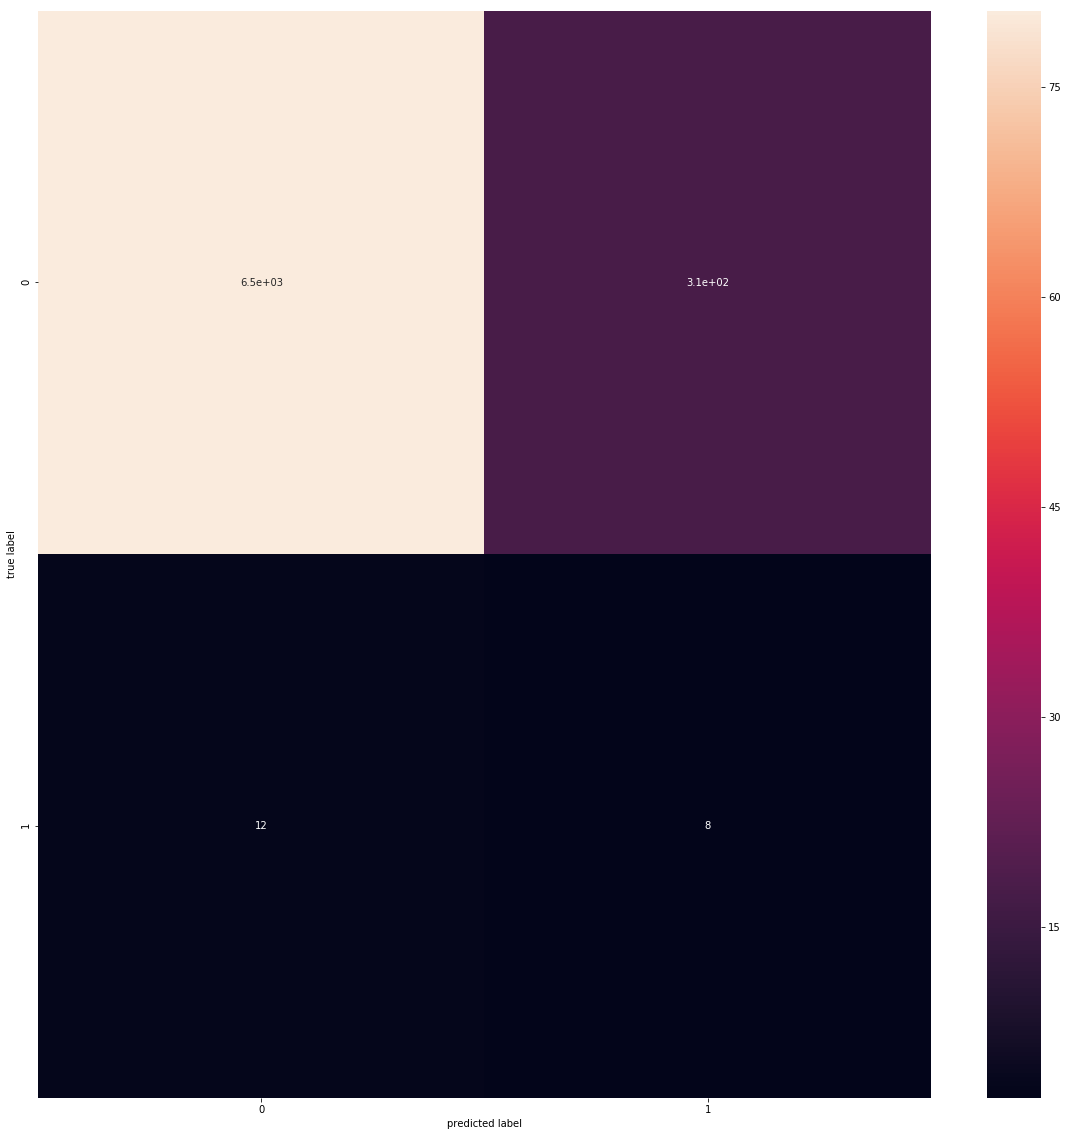

In [28]:
from sklearn.preprocessing import StandardScaler


df_pluto = pd.read_pickle('../data/pkl/df_pluto-cat-feat-2013-2017.pkl')

y_axis = 'ZoneCodeWasVacant'

# Drop categorical columns
df_pluto = df_pluto[df_pluto.columns.difference(['BldgClass','FireComp','IrrLotCode','Sanborn','SplitZone','ZoneDist1'])]
df_pluto = df_pluto[df_pluto.columns.difference(['APPBBL','AreaSource','BBL','BoroCode','CondoNo','TaxMap'])]
df_pluto = df_pluto[df_pluto.columns.difference(['new_bldg_prob','ZoneCodeChanged','LandUse','LandUse2016','ZoneCodeBecameCondo'])]
df_pluto = df_pluto[df_pluto.columns.difference(['LandUse2016_11.0','LandUse2016_10.0','LandUse2016_9.0','LandUse2016_8.0','LandUse2016_7.0','LandUse2016_6.0','LandUse2016_5.0','LandUse2016_4.0','LandUse2016_3.0','LandUse2016_2.0','LandUse2016_1.0'])]
df_pluto = df_pluto.dropna()

# Subset data
df_pluto = df_pluto[::10]

# Create independent/ dependent variables
y = df_pluto[y_axis].astype(int)
X = df_pluto[df_pluto.columns.difference([y_axis])]

# Create test train split
xtrain, xtest, ytrain,ytest= train_test_split(X,y)

scalar = StandardScaler()
xtrains = scalar.fit(xtrain)
xtrains = scalar.transform(xtrain)
xtrains = pd.DataFrame(xtrains)

xtests = scalar.transform(xtest)
xtests = pd.DataFrame(xtests)

log = get_logistic_regression_results(xtrains,ytrain)
test_score = log.score(xtests,ytest)
train_score = log.score(xtrains,ytrain)

print(f'Current Y Axis: {y_axis}')
print("--LOGISTIC--\n")
print(f'test: {test_score} train: {train_score}')

y_pred = log.predict(xtests)
print(classification_report(ytest,y_pred,target_names=["Became Other","Became Condo"]))
plot_confusion(log,xtests,ytest)
print("\n--RANDOM FOREST--\n")
randomforest,rf_results = get_random_forest(X,y)
print(f'rf score: {rf_results}\n')
feature_importance = pd.DataFrame({'Features':X.columns, "Important":randomforest.feature_importances_}).sort_values(by='Important',ascending=False)
feature_importance['Important'] = feature_importance['Important']*1000
print(feature_importance)
print("\n\n")

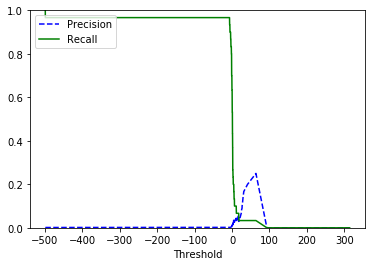

In [21]:
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(log,xtrain,ytrain,cv=3,method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(ytrain,y_pred)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()


Current Y Axis: ZoneCodeWasVacant
--LOGISTIC--

test: 0.8826807449772694 train: 0.8923437958345556
              precision    recall  f1-score   support

Became Other       1.00      0.88      0.94      6812
Became Condo       0.01      0.71      0.01         7

 avg / total       1.00      0.88      0.94      6819


--RANDOM FOREST--

rf score: 0.9987900268882914

              Features  Important
235          YearBuilt    144.015
177   LandUse2016_11.0    137.089
2             BldgArea     44.144
7             BuiltFAR     34.849
192       LotUnitRatio     33.674
193           NumBldgs     33.165
221            ResArea     30.665
220           ProxCode     28.422
230         UnitsTotal     24.942
1            AssessTot     24.873
..                 ...        ...
130  HealthArea_7000.0      0.000
131  HealthArea_7110.0      0.000
132  HealthArea_7120.0      0.000
133  HealthArea_7210.0      0.000
134  HealthArea_7220.0      0.000
135  HealthArea_7310.0      0.000
136  HealthArea_7320

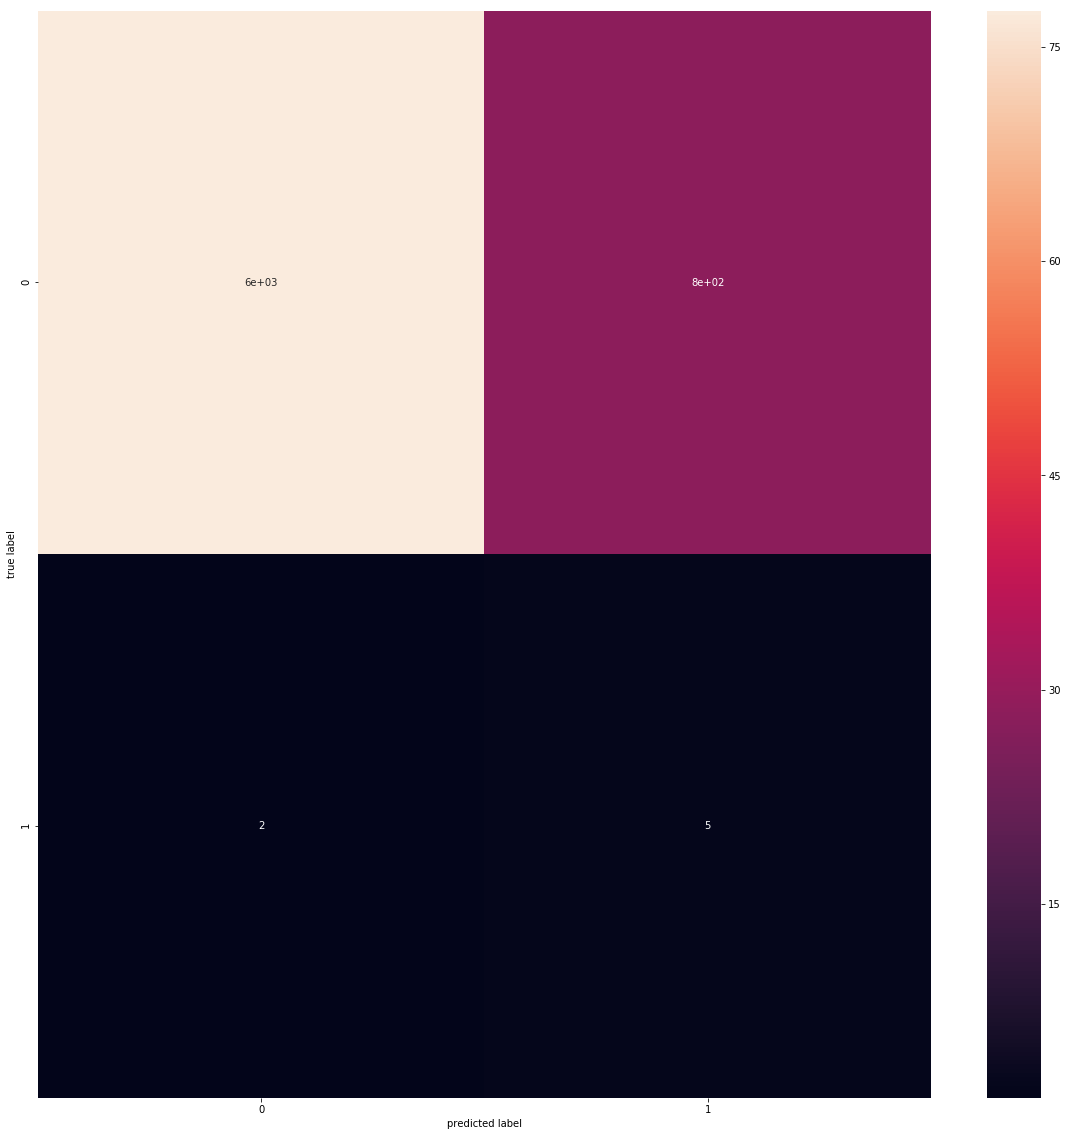

In [19]:
from sklearn.preprocessing import StandardScaler


df_pluto = pd.read_pickle('../data/pkl/df_pluto-cat-feat-2016-2017.pkl')

y_axis = 'ZoneCodeWasVacant'

# Drop categorical columns
df_pluto = df_pluto[df_pluto.columns.difference(['BldgClass','FireComp','IrrLotCode','Sanborn','SplitZone','ZoneDist1'])]
df_pluto = df_pluto[df_pluto.columns.difference(['APPBBL','AreaSource','BBL','BoroCode','CondoNo','TaxMap'])]
df_pluto = df_pluto[df_pluto.columns.difference(['new_bldg_prob','ZoneCodeChanged','ZoneCodeBecameCondo'])]
df_pluto = df_pluto.dropna()


# Subset data
df_pluto = df_pluto[::10]
#df_pluto = df_pluto[df_pluto['ZoneCodeBecameCondo']==1]

# Create independent/ dependent variables
y = df_pluto[y_axis].astype(int)
X = df_pluto[df_pluto.columns.difference([y_axis])]

# Create test train split
xtrain, xtest, ytrain,ytest= train_test_split(X,y)


log = get_logistic_regression_results(xtrain,ytrain)
test_score = log.score(xtest,ytest)
train_score = log.score(xtrain,ytrain)

print(f'Current Y Axis: {y_axis}')
print("--LOGISTIC--\n")
print(f'test: {test_score} train: {train_score}')

y_pred = log.predict(xtest)
print(classification_report(ytest,y_pred,target_names=["Became Other","Became Condo"]))
plot_confusion(log,xtest,ytest)
print("\n--RANDOM FOREST--\n")
randomforest,rf_results = get_random_forest(X,y)
print(f'rf score: {rf_results}\n')
feature_importance = pd.DataFrame({'Features':X.columns, "Important":randomforest.feature_importances_}).sort_values(by='Important',ascending=False)
feature_importance['Important'] = feature_importance['Important']*1000
print(feature_importance)
print("\n\n")

## Logistic Regression
`default=weighted`

In [6]:
def get_logistic_regression_results(xtrain,ytrain):
    log = linear_model.LogisticRegression(class_weight='balanced')
    log.fit(xtrain,ytrain)
    return log

## Confusion Matrix

In [7]:
def plot_confusion(clf, x, y):
    fig = plt.figure(figsize=(20,20))
    y_pred = clf.predict(x)
    c_mat = metrics.confusion_matrix(y,y_pred)
    labels = np.unique(y)
    sns.heatmap(
        np.sqrt(c_mat),
        annot=c_mat,
        xticklabels=labels,
        yticklabels=labels,
        cbar=True);
    plt.ylabel("true label")
    plt.xlabel("predicted label")
    
#plot_confusion(log,xtest,ytest)

# Random Forrests

In [8]:
def quick_test_afew_times(model, X, y, n=10):
    return np.mean([quick_test(model, X, y) for j in range(n)])

def quick_test(model, X, y):
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=1234)
    model.fit(xtrain, ytrain)
    return model.score(xtest, ytest)

def get_random_forest(X,y):
    randomforest = RandomForestClassifier(n_estimators=50, bootstrap=True, oob_score=True,class_weight="balanced")
    results = quick_test_afew_times(randomforest, X, y)
    return (randomforest, results)